# Total Comparison


### Importing all Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns


### Importing the Dataset


In [7]:
dataset = pd.read_csv('Crop_recommendation.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
#Encode the target variable from string labels to integer labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

### Training

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### DT

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(accuracy_dt)

0.9836363636363636


### Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(accuracy_rf)

0.9927272727272727


### XG_BOOST

In [13]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(random_state=0)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(accuracy_xgb)

0.9945454545454545


## Comparing accuracy

In [14]:
model_accuracy_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Decision Tree'],
    'Accuracy': [accuracy_rf, accuracy_xgb, accuracy_dt]
})

print("Model Accuracy Comparison:")
print(model_accuracy_df)

Model Accuracy Comparison:
           Model  Accuracy
0  Random Forest  0.992727
1        XGBoost  0.994545
2  Decision Tree  0.983636


# Bar Graph

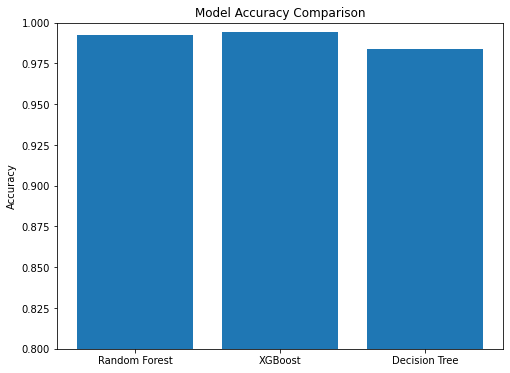

In [15]:
plt.figure(figsize=(8, 6))
plt.bar(model_accuracy_df['Model'], model_accuracy_df['Accuracy'])
plt.ylim(0.8, 1.0)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()



In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report

#confusion matrix for each model
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_dt = confusion_matrix(y_test, y_pred_dt)

#classification report for each model
cr_rf = classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_)
cr_xgb = classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_)
cr_dt = classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_)

# Classification Report for each Model

In [18]:
# Print classification reports
print("Random Forest - Classification Report:")
print(cr_rf)
print("\nXGBoost - Classification Report:")
print(cr_xgb)
print("\nDecision Tree - Classification Report:")
print(cr_dt)


Random Forest - Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        24
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        24
        jute       0.96      0.89      0.93        28
 kidneybeans       1.00      1.00      1.00        23
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        24
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        27
   muskmelon       1.00      1.00      1.00        27
      orange       1.00      1.00      1.0

# Visulasing Confusion Matrix

In [ ]:
#Visualizing confusion matrices
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Random Forest - Confusion Matrix')

plt.subplot(132)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('XGBoost - Confusion Matrix')

plt.subplot(133)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Decision Tree - Confusion Matrix')

plt.tight_layout()
plt.show()